In [9]:
import wave
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# File of Throat microphone open
throat = '/Users/jin237/Documents/juxtaphony_project/new_iinodemo/Audio/throat_iinodemo_03.wav'
tmfile = wave.open(throat, 'r')
# File of Condenser microphone open
conde = '/Users/jin237/Documents/juxtaphony_project/new_iinodemo/Audio/conde_iinodemo_01.wav'
cmfile = wave.open(conde, 'r')

In [11]:
# Get channels, sample width, sampling rate, the number of sample
numch_tm = tmfile.getnchannels()
numch_cm = cmfile.getnchannels()
samplewidth_tm = tmfile.getsampwidth()
samplewidth_cm = cmfile.getsampwidth()
samplerate_tm = tmfile.getframerate()
samplerate_cm = cmfile.getframerate()
numsamples_tm = tmfile.getnframes()
numsamples_cm = cmfile.getnframes()

In [12]:
# Print each value of TM
print("Throat microphone")
print("チャンネル数 = ", numch_tm)
print("サンプル幅 (バイト数) = ", samplewidth_tm)
print("サンプリングレート (Hz) =", samplerate_tm)
print("サンプル数 =", numsamples_tm)
print("録音時間 =", numsamples_tm / samplerate_tm)

# Print each value of CM
print("Condenser microphone")
print("チャンネル数 = ", numch_cm)
print("サンプル幅 (バイト数) = ", samplewidth_cm)
print("サンプリングレート (Hz) =", samplerate_cm)
print("サンプル数 =", numsamples_cm)
print("録音時間 =", numsamples_cm / samplerate_cm)

Throat microphone
チャンネル数 =  1
サンプル幅 (バイト数) =  2
サンプリングレート (Hz) = 44100
サンプル数 = 757694
録音時間 = 17.18126984126984
Condenser microphone
チャンネル数 =  1
サンプル幅 (バイト数) =  2
サンプリングレート (Hz) = 44100
サンプル数 = 757694
録音時間 = 17.18126984126984


In [13]:
# Read all frame
buf_tm = tmfile.readframes(numsamples_tm)
tmfile.close()

buf_cm = cmfile.readframes(numsamples_cm)
cmfile.close()

In [15]:
# Change to ndarray of numpy
data_tm = np.frombuffer(buf_tm, dtype='int16')
data_tm = data_tm/32768.0
data_tm = data_tm[0::2]


data_cm = np.frombuffer(buf_cm, dtype='int16')
data_cm = data_cm/32768.0
data_cm = data_cm[0::2]

In [25]:
start = 60000
N_tm = samplerate_tm
N_cm = samplerate_cm
c_tm = np.fft.fft(data_tm[start:start+N_tm])
c_cm = np.fft.fft(data_cm[start:start+N_cm])
c_tm = abs(c_tm)
c_cm = abs(c_cm)

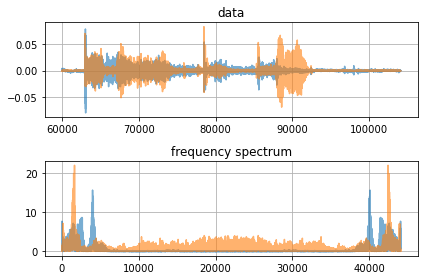

In [29]:
plt.subplot(2,1,1)
plt.title('data')
plt.grid()
plt.plot(range(start, start+N_tm), data_tm[start:start+N_tm], alpha=0.6)
plt.plot(range(start, start+N_tm), data_cm[start:start+N_cm],alpha=0.6)
plt.savefig('mix_iinodemo.png')
plt.subplot(2,1,2)
plt.title('frequency spectrum')
plt.grid()
plt.plot(c_tm, linestyle='-', alpha=0.6)
plt.plot(c_cm, linestyle='-', alpha=0.6)
plt.tight_layout()
plt.savefig('mix_iinodemo.png')